In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'A':['a','b','c','a','b'],
                   'B':[1,2,3,1,0]})

In [3]:
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


### 라벨 인코더 (LabelEncoder)

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [6]:
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [7]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [12]:
df['le_A'] = le.transform(df['A'])

In [13]:
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [14]:
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [15]:
le.transform(['a'])

array([0])

In [16]:
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

### 스케일링

In [17]:
df = pd.DataFrame({'A':[10, 20, -10, 0, 25],
                   'B':[1,2,3,1,0]})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


#### MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [19]:
mms.data_max_,mms.data_min_,mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [20]:
df_mms = mms.transform(df)

In [21]:
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [22]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

#### StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [31]:
df_ss = ss.fit_transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [29]:
# 평균과 표준편차
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [32]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

#### Robust Scaler

In [34]:
df = pd.DataFrame({'A': [-0.1, 0, 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5.0]})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [37]:
df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [38]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


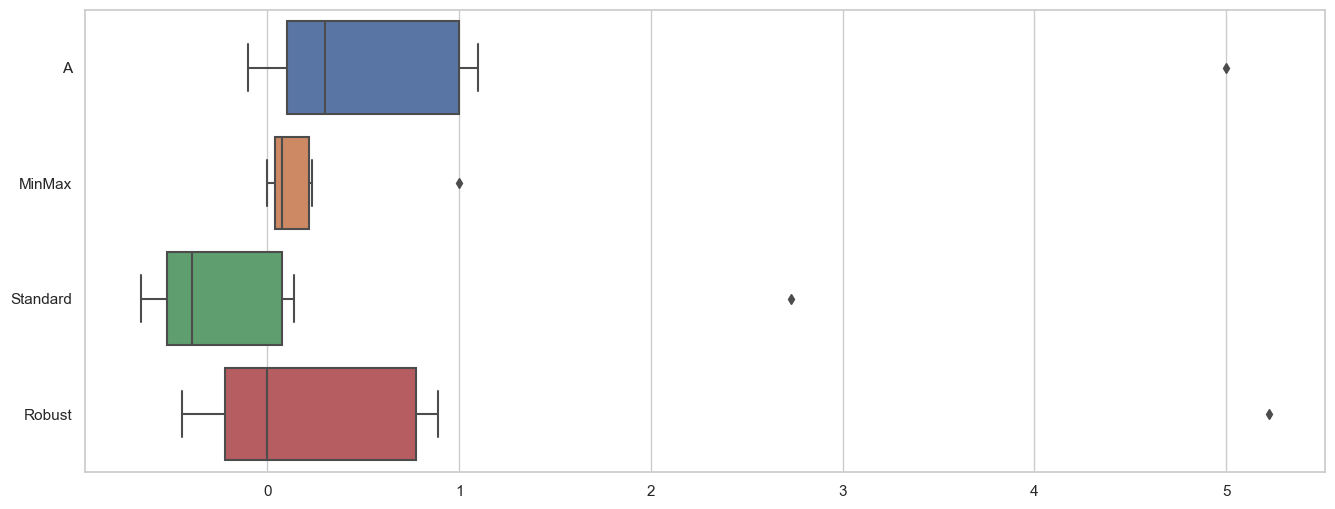

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient='h');